In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
data=pd.read_csv("../data/heart_processed.csv")
data.head(5)
x=data.drop("HeartDisease",axis=1)
y=data["HeartDisease"]



In [25]:
#split data into train/test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
y_test

295    1
473    1
52     0
182    1
234    0
      ..
470    0
80     0
279    0
242    1
232    0
Name: HeartDisease, Length: 150, dtype: int64

In [26]:
#training the model with "Logistic Regression"
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

#evaluating
y_pred=lr.predict(x_test)
print("Logistic Regression Report:\n",classification_report(y_test,y_pred))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86        78
           1       0.83      0.88      0.85        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [27]:
#training the model with "Random Forest"
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

rf_y_pred=rf.predict(x_test)
print("Random Forest Report:\n",classification_report(y_test,rf_y_pred))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87        78
           1       0.86      0.85      0.85        72

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



In [28]:
#optimizing Random Forest with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid={
    "n_estimators":[100,200],
    "max_depth":[None,10],
    "min_samples_split":[2,5]
}
grid=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
grid.fit(x_train,y_train)
print("best params: ",grid.best_params_)
best_rf=grid.best_estimator_


best params:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


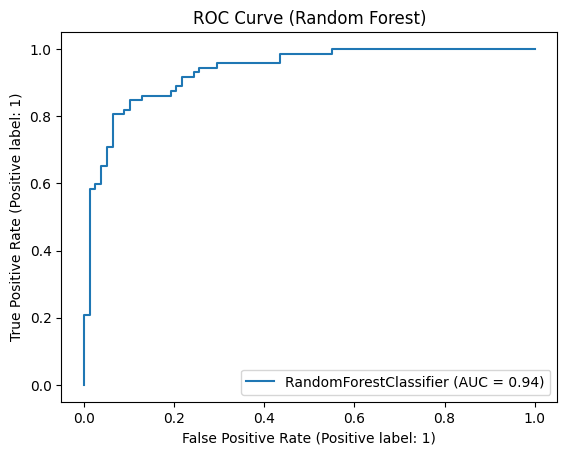

In [29]:
#evaluation with ROC Curve and AUC
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(best_rf,x_test,y_test)
plt.title("ROC Curve (Random Forest)")
plt.savefig("../outputs/roc_curve.png")

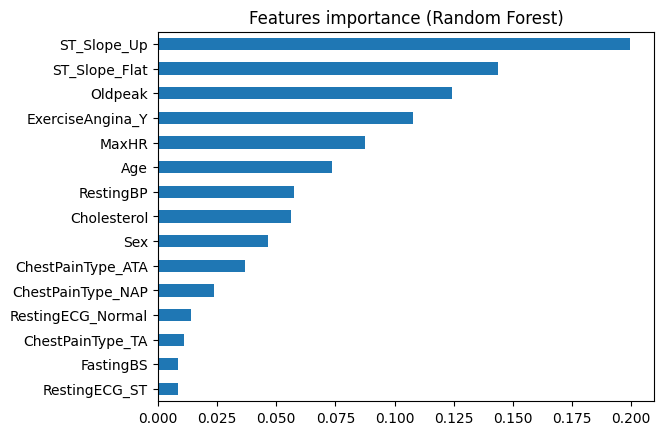

In [30]:
#Feature Importance
importances_scores=best_rf.feature_importances_
features=x_train.columns

pd.Series(importances_scores,index=features).sort_values().plot(kind="barh")
plt.title("Features importance (Random Forest)")
plt.savefig("../outputs/feature_importance.png")

<Figure size 640x480 with 0 Axes>

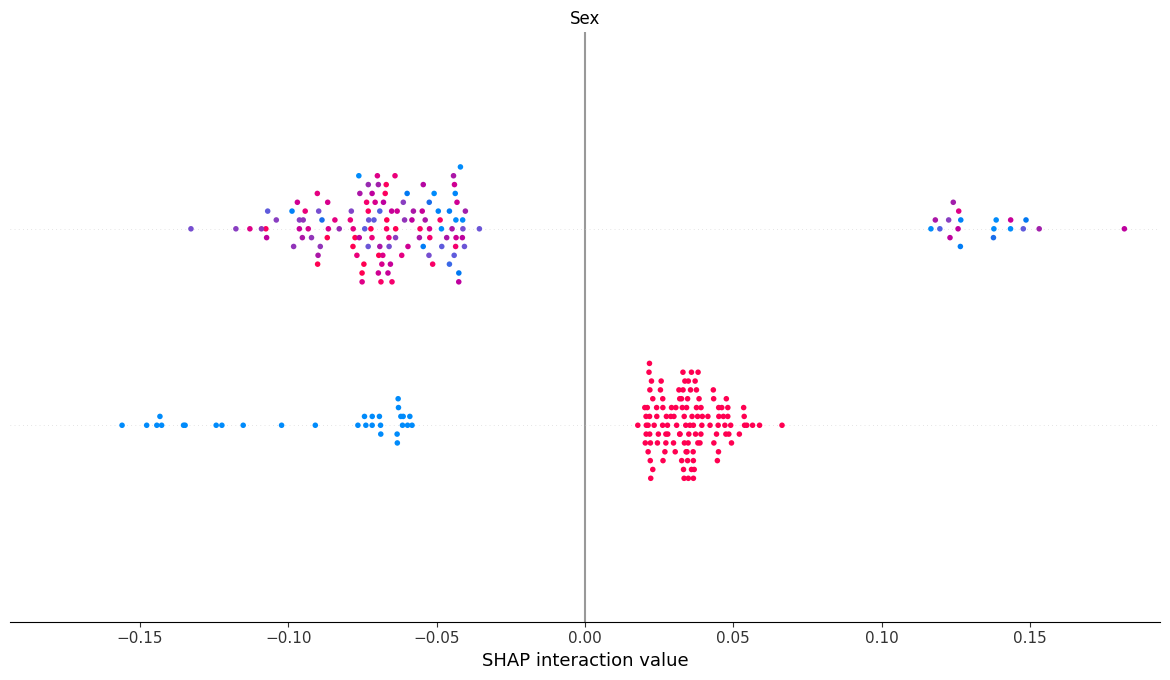

<Figure size 640x480 with 0 Axes>

In [34]:
#SHAP Explanations
import shap

explainer=shap.TreeExplainer(best_rf)
shap_values=explainer.shap_values(x_test)

shap.summary_plot(shap_values,x_test,plot_type="bar")
plt.savefig("../outputs/shap_summary.png")  

